In [72]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale
import cv2
import matplotlib.pyplot as plt

name1 = "picture1"
name2 = "picture2"

imname1 = "hybridimages/" + name1 + ".jpg"
imname2 = "hybridimages/" + name2 + ".jpg"

im1 = cv2.imread(imname1)
im2 = cv2.imread(imname2)

im1_Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [73]:
def cv2_imshow(image):
# developed by Kanishke Gamagedara, udpated by MAE6292
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
        raise
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')

In [186]:
def hybridImage(im1, im2, sigmaLP, sigmaHP, weightLP, weightHP):
    lowPass = cv2.GaussianBlur(im1, (0, 0), sigmaLP)
    im2_Blur = cv2.GaussianBlur(im2, (0, 0), sigmaHP)
    highPass = cv2.subtract(im2, im2_Blur)
#     return highPass
    return lowPass, highPass, cv2.addWeighted(highPass, weightHP, lowPass, weightLP, 0)

<Figure size 1440x720 with 0 Axes>

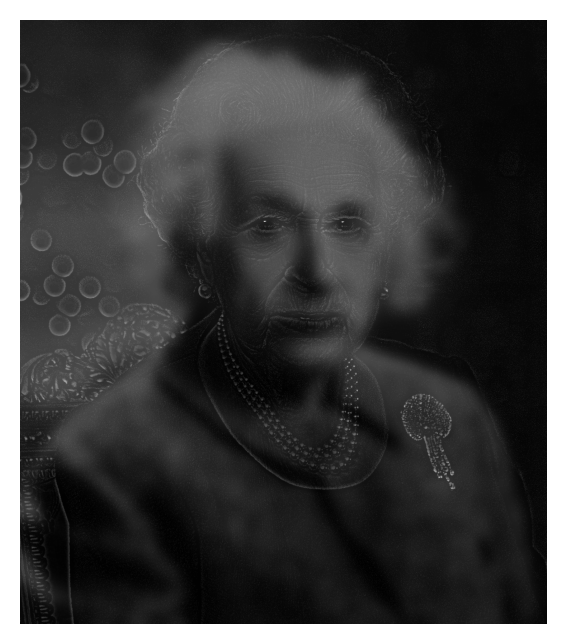

In [187]:
low1, high1, mixed1 = hybridImage(im1_Gray, im2_Gray, 10, 3, 0.4, 1.0)
plt.figure(figsize=(20,10))
cv2_imshow(mixed1)

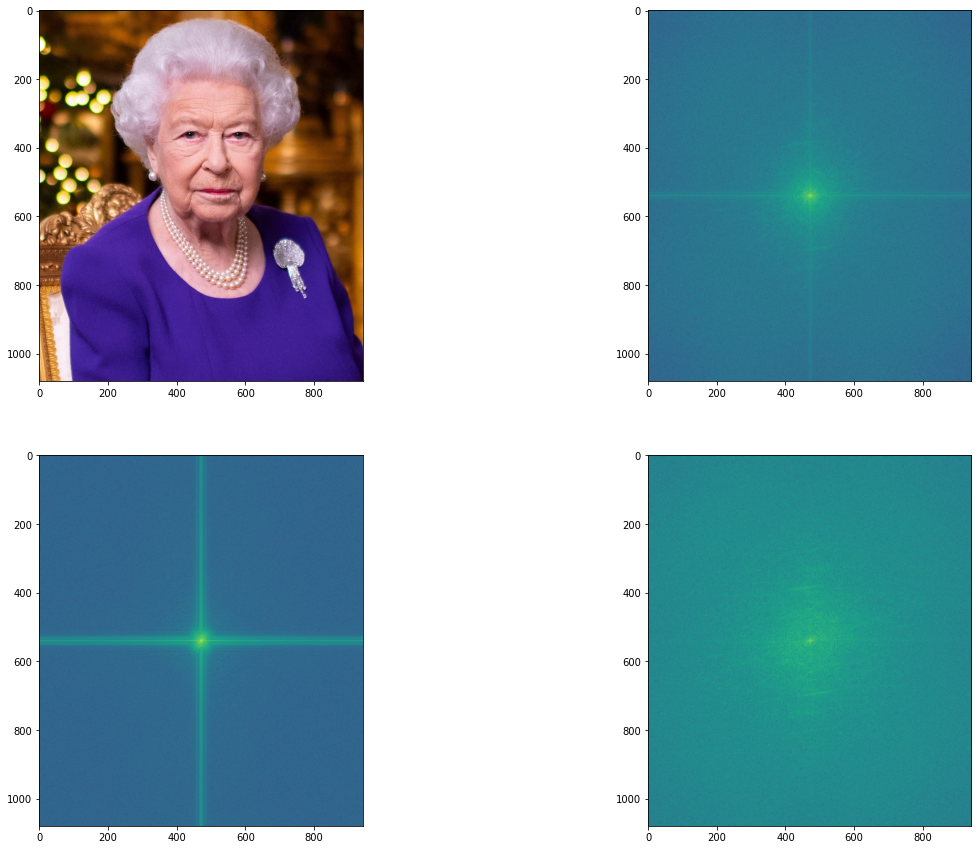

In [197]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_Gray)))))
plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low1)))))
plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high1)))))
